# Gradient Descent Demonstration (from scratch)

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. Data Generation and Setup
# -------------------------------

In [44]:
def generate_data( n_samples = 100, noise = 0.1, seed =42):
    """
    Generate random samples (synthetic) linear data: y=4 + 3*X + noise
    """
    np.random.seed(seed) #to ensure the reproducibility of the same random data -->to fix the random numbers generated
    X = 2 * np.random.randn(n_samples, 1) #generates random numbers from `standard normal distribution`
    y = 4 + 3*X + noise*np.random.randn(n_samples, 1) # Creates a random distribution around a line having some random noise added to it as well

    return X, y
    

`np.random.randn`:

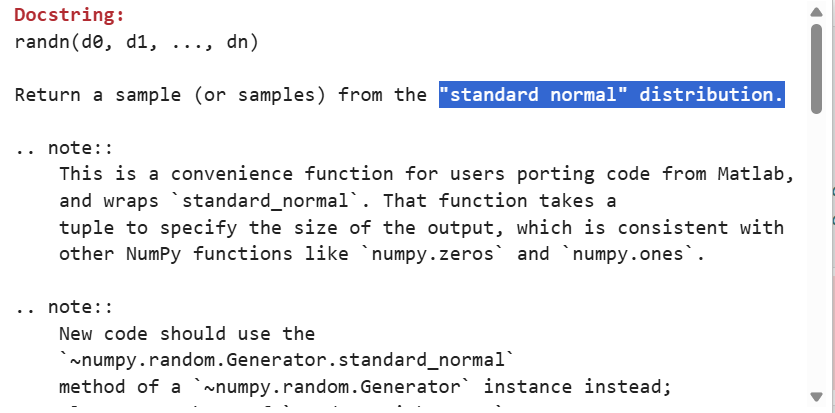

In [45]:
random_data = np.random.randn(1000)

In [46]:
random_data[:10]

array([ 0.35778736,  0.56078453,  1.08305124,  1.05380205, -1.37766937,
       -0.93782504,  0.51503527,  0.51378595,  0.51504769,  3.85273149])

In [47]:
random_data.mean(), random_data.std()

(0.05421285205572885, 0.9986706084554131)

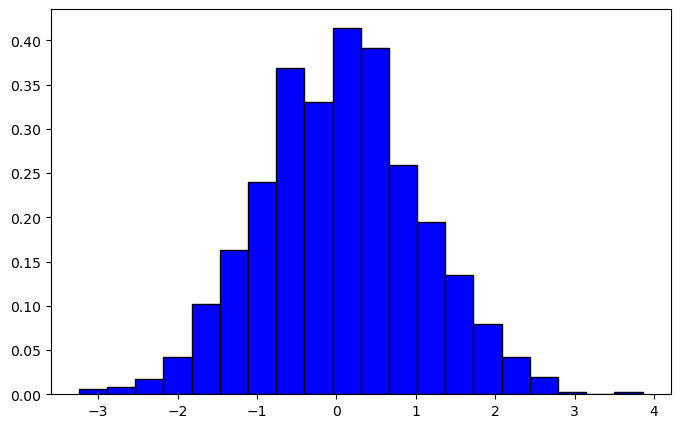

In [48]:
plt.figure(figsize=(8,5))
plt.hist(random_data, bins=20, density = True, color='blue', edgecolor='black')
plt.show()

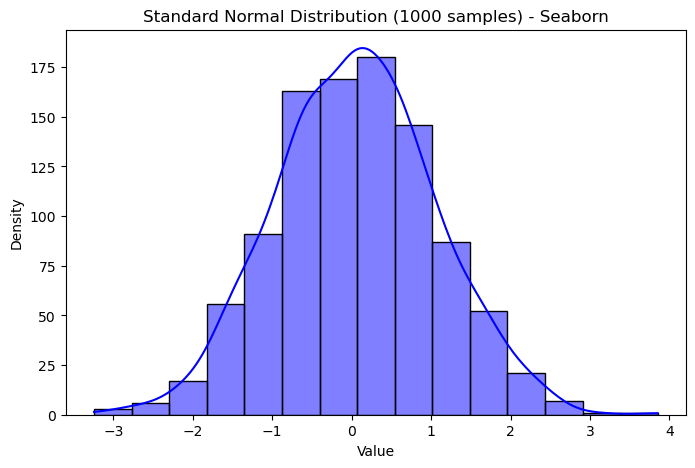

In [49]:
# Plot using seaborn with KDE curve
plt.figure(figsize=(8,5))
sns.histplot(random_data, bins=15, kde=True, color='blue', edgecolor='black')

# Add labels and title
plt.title("Standard Normal Distribution (1000 samples) - Seaborn")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(False)
plt.show()

In [50]:
### Let us generate some data
X, y = generate_data(n_samples=100, noise=2)

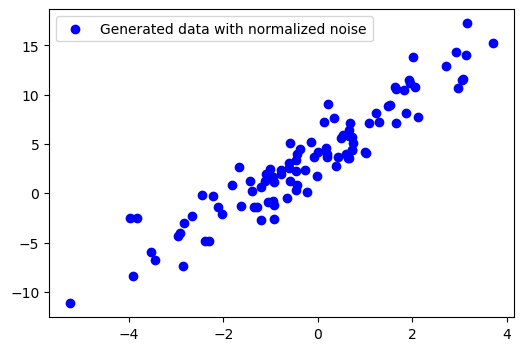

In [51]:
### Let us plot the data distribution
plt.figure(figsize=(6,4))
plt.scatter(X, y, color='blue' , label = 'Generated data with normalized noise')
plt.legend()
plt.show()

### Data distribution `without noise`

In [52]:
### Let us generate some data
X1, y1 = generate_data(n_samples=100, noise=0)

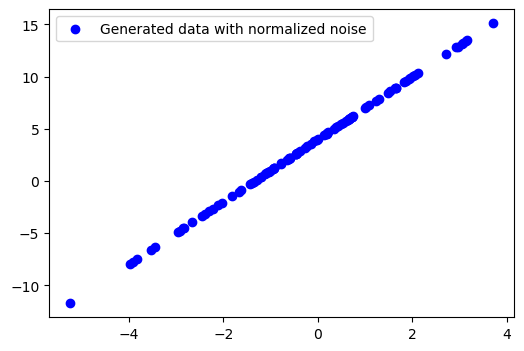

In [53]:
### Let us plot the data distribution
plt.figure(figsize=(6,4))
plt.scatter(X1, y1, color='blue' , label = 'Generated data with normalized noise')
plt.legend()
plt.show()

### Let us define the `cost function` for simple linear regression 

- For linear regression problem, we use `mean-squared error` (MSE)

In [ ]:
def compute_cost(X, y, theta):
    """
    Compute the mean squared error cost function
    """
    m = len(y) #no. of rows in the data
    return np.sum((
    